In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [39]:
data = pd.read_csv(r"Mall_Customers.csv")

In [40]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [41]:
data.shape

(200, 5)

In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [43]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

<AxesSubplot: >

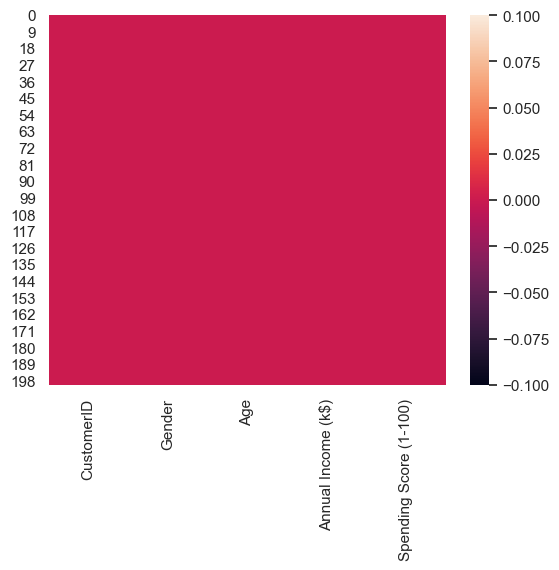

In [44]:
sns.heatmap(data.isnull())

<h3>Selection of columns based on need from the data.</h3>

In [45]:
X = data.iloc[:, [3,4]].values

<h3>Determining the correct number of clusters</h3>
<h3>WCSS: Within Clusters Sum of Squares</h3>

In [46]:
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)

    wcss.append(kmeans.inertia_)

c:\Users\mahdi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\mahdi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\mahdi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\mahdi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value 

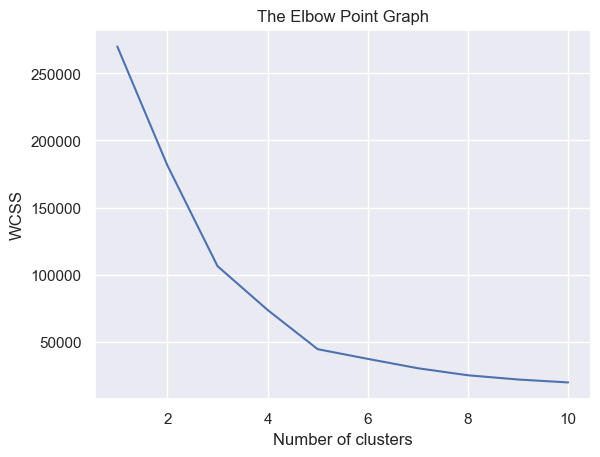

In [47]:
sns.set()
plt.plot(range(1,11), wcss)
plt.title("The Elbow Point Graph")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

We have two elbow points in the graph.
Elbow Points defined to be points where the lines derives


Graph analysis shows that number of cluster 5 is where there is no important deviation after, therefore, 5 is the optimal K number.

In [48]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=0)
kmeans.fit(X)

Y = kmeans.fit_predict(X)
print(Y)


[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 1 4 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 1 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 1 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


c:\Users\mahdi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\mahdi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


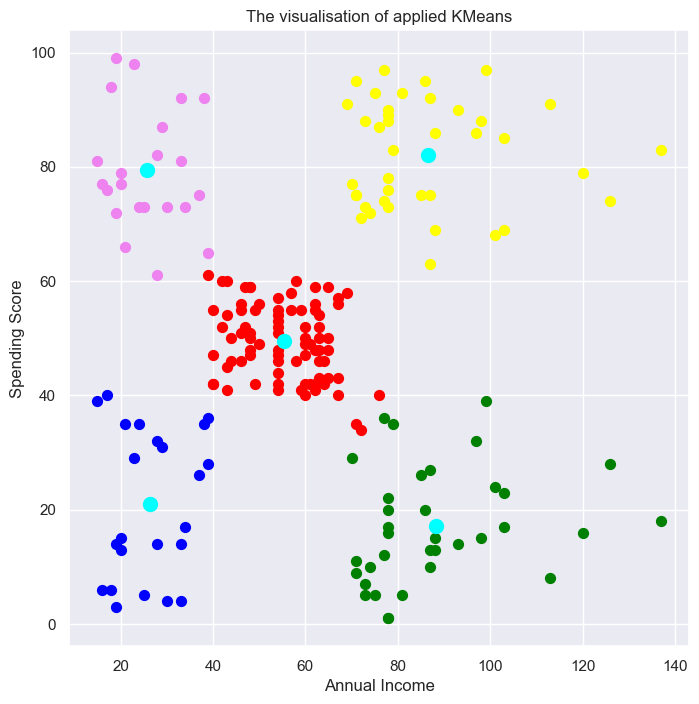

In [49]:
plt.figure(figsize=(8,8))
plt.scatter(X[Y==0,0], X[Y==0,1], s=50, c='green', label="Cluster 1")
plt.scatter(X[Y==1,0], X[Y==1,1], s=50, c='red', label="Cluster 2")
plt.scatter(X[Y==2,0], X[Y==2,1], s=50, c='yellow', label="Cluster 3")
plt.scatter(X[Y==3,0], X[Y==3,1], s=50, c='violet', label="Cluster 4")
plt.scatter(X[Y==4,0], X[Y==4,1], s=50, c='blue', label="Cluster 5")
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c="cyan", label="Centroids")
plt.title("The visualisation of applied KMeans")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.show() 

<h3>What can this plot show us:</h3>


We have 5 categories of clients: 

First group with low annual income and low spending. ( Blue )
Second group with low income and low spending. ( Green )
Third group with medium annual income and medium spending. ( Red )
Fourth group with low income and high spending. ( Violet )
Fith group with high annual income and high spending. ( Yellow )


<h3>How can this plot be beneficial: </h3>

By targeting specicif offers to a specefic targeted categorie of clients.
For instance high priced offers can be targeted towards a yellow category.
While specific offers will be redirected to compatible categories of clients.